In [21]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

import numpy as np

In [78]:
root = ET.parse('../../../datasets/Data_27012021_noisy/benchmark/dynamic_speed_0-50Hz_1_sec_no_load_closed_loop.wse').getroot()

In [110]:
time = []
speed = []
torque = []
var_q = []
var_d = []

for elem in root:
    if elem.tag == 'RowData':
        step, data = elem.getchildren()
        time.append(int(step.text))
        spd, trq, q, d = data.getchildren()
        speed.append(int(spd.text))
        torque.append(int(trq.text))
        var_q.append(int(q.text))
        var_d.append(int(d.text))
        
time.sort()

In [111]:
time = np.asarray(time)
speed = np.asarray(speed)
torque = np.asarray(torque)
var_q = np.asarray(var_q)
var_d = np.asarray(var_d)

In [112]:
time = (time - time[0]) / 10000000
speed = speed / 2**15 * 250
torque = torque / 2**12 * 100
var_q = var_q / 2**15 * 921
var_d = var_d / 2**12 * 35.5

iq_var_q = var_q[1::2]
uq_var_q = var_q[::2]

id_var_d = var_d[1::2][:-1]
ud_var_d = var_d[::2][:-1]

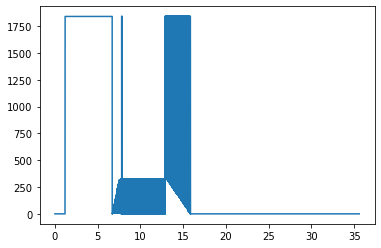

In [121]:
plt.plot(time, var_q)

In [124]:
speed[speed > 400] = 0
torque[torque > 200] = 0
var_q[var_q > 100] = 100

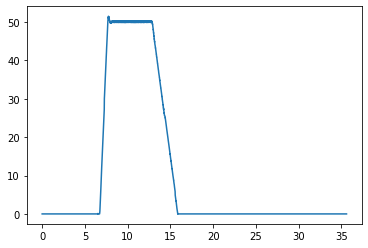

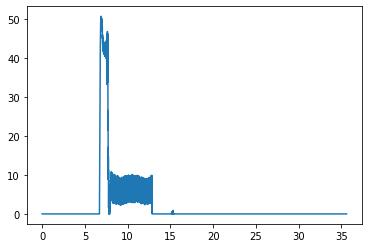

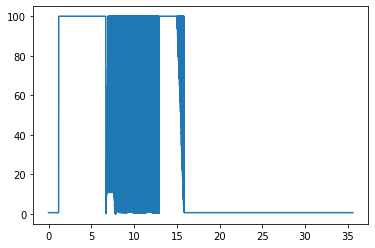

In [127]:
plt.plot(time, speed)
plt.show()
plt.plot(time, torque)
plt.show()
plt.plot(time, var_q)